In [3]:
library(ggplot2)
library(dplyr)
library(tidytext)

In [4]:
upload = read.csv("fake.csv")

da = upload %>% select(published, title, country, replies_count, likes, comments, shares, type)
da$title = as.character(da$title)

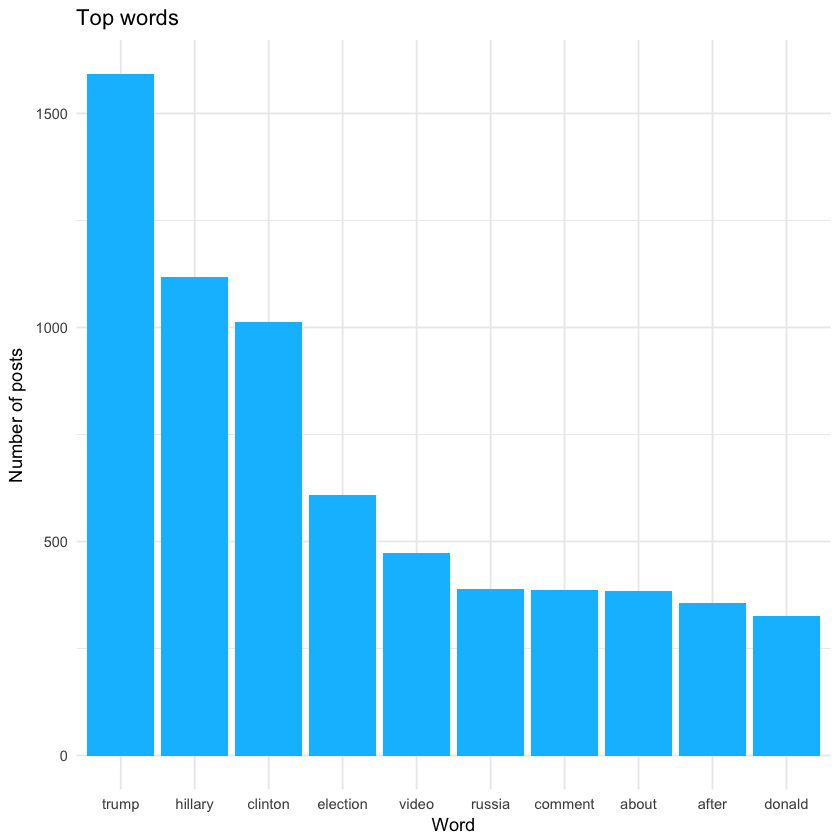

In [18]:
mytext = data_frame(text = da$title) %>% 
  unnest_tokens(word, text) %>% 
  group_by(word) %>% 
  count(word, sort = TRUE) %>% mutate(len=nchar(word)) %>% filter(len>4)

pl = ggplot(head(mytext,10), aes(x=reorder(word, -n),y=n)) + 
  geom_col(fill = "deepskyblue") + 
  theme_minimal() + 
  ylab("Number of posts") + 
  xlab("Word") + 
  ggtitle("Top words")
pl

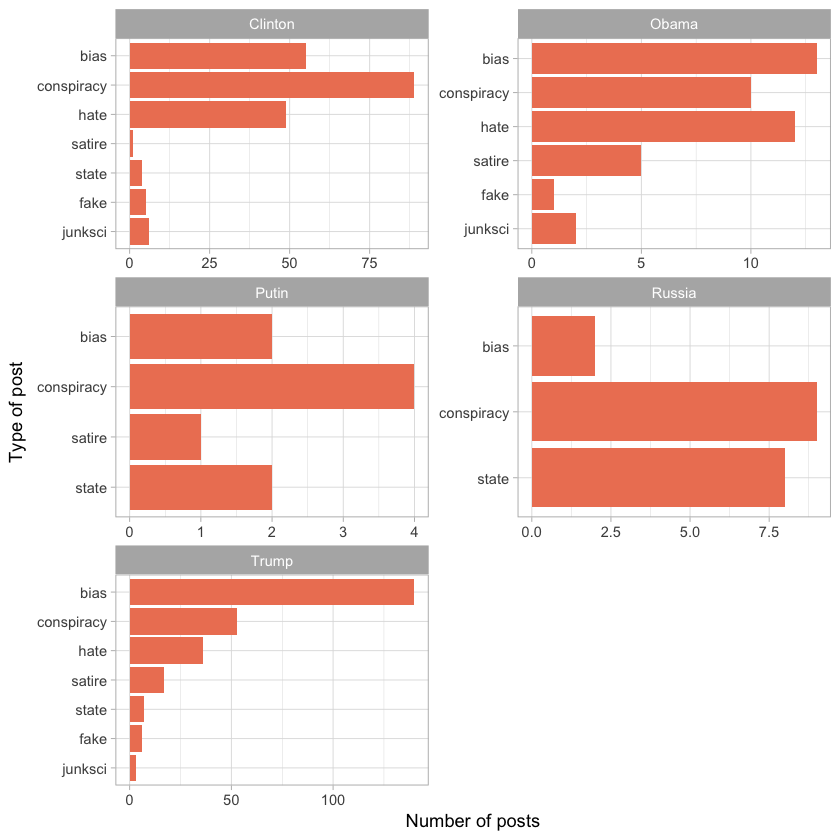

In [24]:
da = da %>% mutate(Grupa = ifelse(grepl("Trump", da$title)==TRUE | grepl("Donald", da$title)==TRUE,"Trump",
                                  ifelse(grepl("Hillary", da$title)==TRUE | grepl("Clinton", da$title)==TRUE,"Clinton",
                                         ifelse(grepl("Barack", da$title)==TRUE | grepl("Obama", da$title)==TRUE,"Obama",
                                                ifelse(grepl("Vladimir", da$title)==TRUE | grepl("Putin", da$title)==TRUE,"Putin",
                                                              ifelse(grepl("Russia", da$title)==TRUE,"Russia",0))))))
#Number of posts split by type
dafin = da %>% filter(Grupa == 'Clinton' | Grupa == 'Trump' | Grupa == 'Obama' | Grupa == 'Putin' | Grupa == 'Russia') %>% 
  group_by(type,Grupa) %>% count(Grupa) %>% filter(type!='bs')

plota = ggplot(dafin, aes(x=reorder(type, n), y=n, fill = Grupa)) + 
  geom_col(fill="salmon2") + 
  facet_wrap(~Grupa, ncol = 2, scales = "free") + 
  theme_light() + 
  ylab("Number of posts") + 
  xlab("Type of post") + 
  coord_flip()
plota

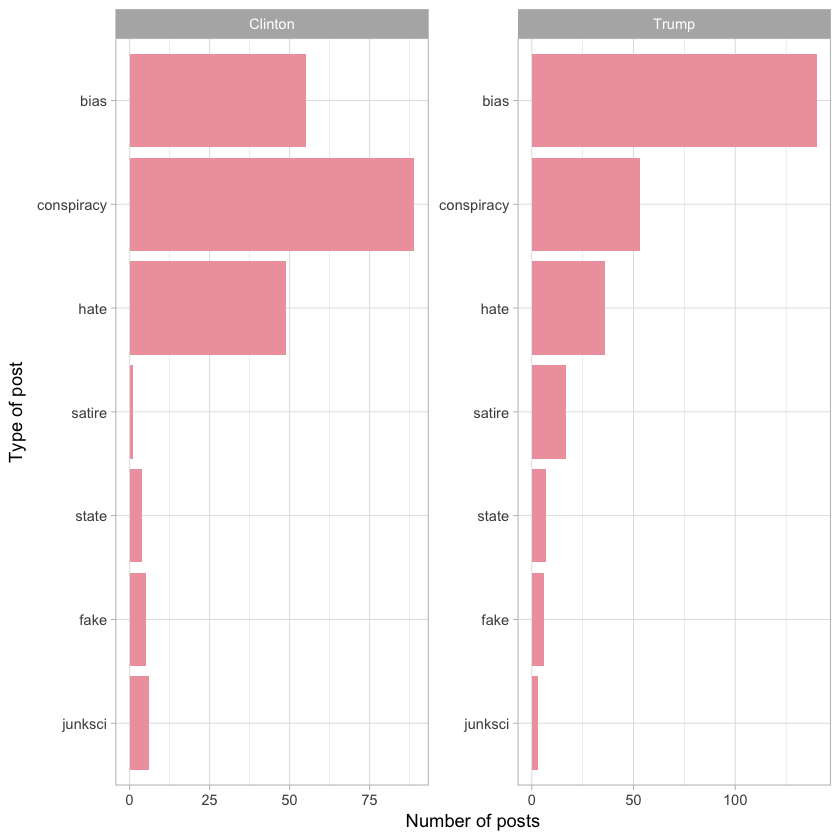

In [25]:
dafinal = da %>% filter(Grupa == 'Clinton' | Grupa == 'Trump') %>% 
  group_by(type,Grupa) %>% count(Grupa) %>% filter(type!='bs')

pl2 = ggplot(dafinal, aes(x=reorder(type, n), y=n, fill = Grupa)) + 
  geom_col(fill="lightpink2") + 
  facet_wrap(~Grupa, ncol = 2, scales = "free") + 
  theme_light() + 
  ylab("Number of posts") + 
  xlab("Type of post") + 
  coord_flip()
  
pl2

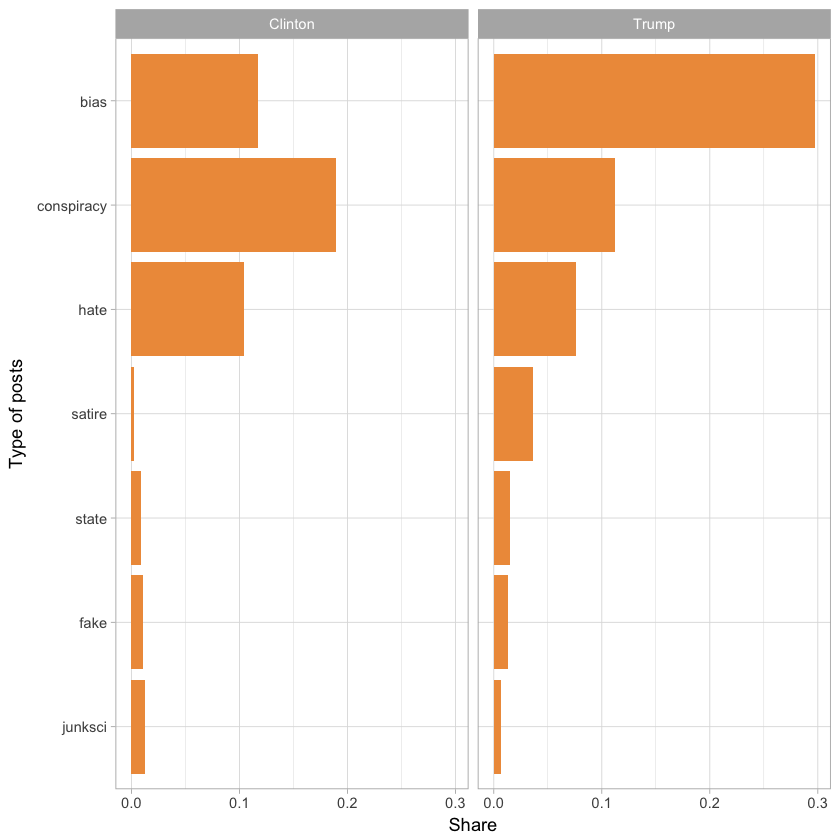

In [26]:
pl3 = dafinal %>% mutate(Share = n/sum(dafinal$n)) %>% ungroup() %>% 
  mutate(type=reorder(type,Share)) %>% 
  ggplot(aes(type, Share, fill= Grupa)) + 
  geom_col(fill="tan2") + 
  theme_light() + 
  facet_wrap(~Grupa, ncol = 2) + 
  xlab("Type of posts") + 
  coord_flip()
pl3

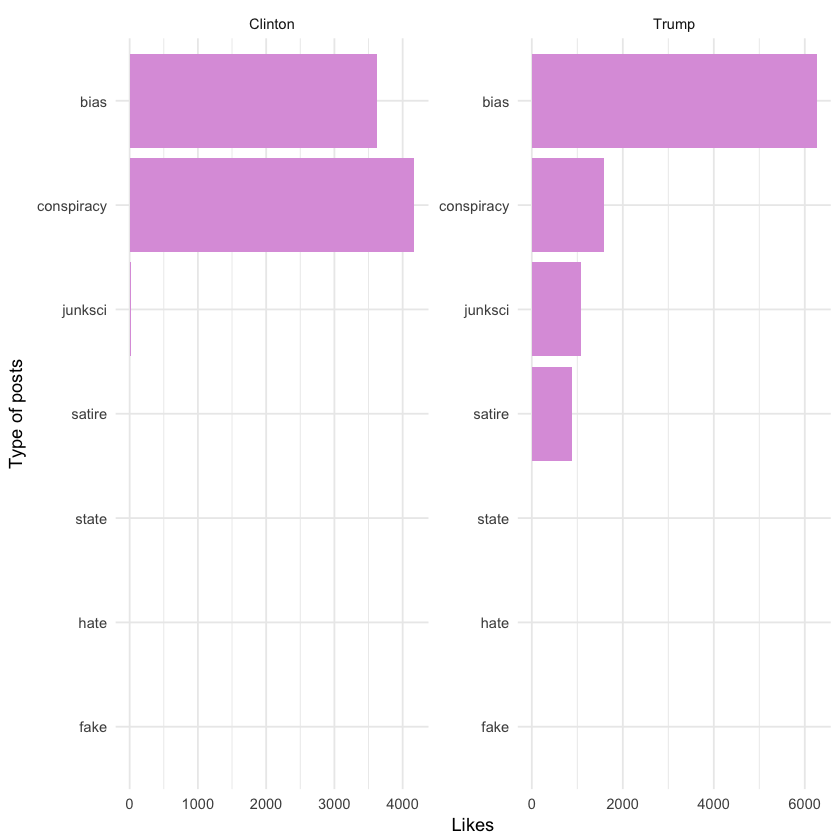

In [29]:
pl4 = da %>% select(Grupa, type, likes, comments) %>% filter(Grupa=="Trump" | Grupa=="Clinton") %>% group_by(Grupa, type) %>% 
  summarise(Likes=sum(likes)) %>% filter(type!='bs') %>%
  ggplot(aes(reorder(type, Likes), Likes, fill = Grupa)) +
  geom_col(fill="plum") + 
  theme_minimal() +
  facet_wrap(~Grupa, ncol = 2, scales = "free") + 
  xlab("Type of posts") + 
  coord_flip()

pl4